# Lecture 3 - Part 2 : Summarising, Aggregating, and Grouping data in Pandas 


In this lecture you will be exploring two very useful Pandans functions: `.groupby()` and `.aggregate()`.

**The utility of these functions is in their capability of grouping large data frames by different variables, and applying summary functions on each group.** 

Lets get started with these functions!!


*Ps. This notebook is based in it's first part on notebook 4 from the Pandas Cookbook: https://github.com/jvns/pandas-cookbook*

*And the documentation here on Split-Apply-Combine: http://pandas.pydata.org/pandas-docs/stable/groupby.html*


## GroupBy and Aggregate <a name="_groupby and aggregate "></a>

![groupby](img/groupby.png)

- `data.groupby(['column_name_with_categories'])`
- `data.groupby(['column_name_with_categories']).agg('function')`, `data.groupby(['column_name_with_categories']).aggregate('function')`, `data.groupby(['column_name_with_categories']).function()` do the same: They group the data by the categories of a specified column and then apply the function to each group.
- `data.groupby(['column_name_with_categories'], as_index)`: `as_index` can be `TRUE` or `FALSE`. `TRUE` if we want the categories of the column to be considered as index
- `data.groupby(['column_name_with_categories'])[['column_name_to_access_statistics']]`: access a certain column's statistics
- `data.groupby("column_name_with_categories").get_group("group_name")`gets a specific group

- Some plot types will do groups for you; just say what you want to group "by". For example, `hist()` will create histograms for you. Say you want to plot the histogram per month:

`data.hist("column_name_to_access_statistics", by="column_name_with_categories", figsize=(,))`

- Perhaps you would like to sort the values to have a better feel of your results. For that you can use the `sort_values` function:

`data.groupby("column_name_with_categories").aggregate(function).sort_values(
                                                         by="column_name_to_access_statistics",ascending=False)`

### Define Multiple Summary Functions
To apply multiple summary functions to a single column, we pass a list of functions like this:
`functions = ['function1', 'function2', ...]`. functions can be mean, min, max, count, sum, etc..

`data.groupby(['column_name_with_categories', as_index=])[['column_name_to_access_statistics']].agg(functions)` 

### Applying Different Functions to Different Columns

`data.groupby(['column_name_with_categories', as_index=])[['column_name_to_access_statistics']].agg({'column1':'function1', 'column2':'function2',...})` 


### Transform
Transform does the same as aggregate but it does not create a new DataFrame. It adds a column to the original data.
`data.groupby(['column_name_with_categories', as_index=])[['column_name_to_access_statistics']].transform(functions)` 


### GroupBy objects type
GroupBy Objects are dicts, with keys being how they are grouped. For example if we group rainfall data by the Month, the key will be the month.

The function `.groups` shows you all the resulting dictionaries with their keys and the index of all the rows having this key.

`data.groupby(by="column").groups`

This means simple dict operations work on them and you can iterate over them. It's a special kind of dict that doesn't allow items() -- but works same way:

`groups = rain.groupby("column_name_with_categories")`

`for key, group in groups`

    `print(group)`

You can use the groupby object function aggregate to them, of course.

To find the size of each group : `.size()`
### Resources
If you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.



# Inclass Exercises

We will work with `bikes.csv` which contains the number of people who were on Montréal's bike paths in 2012. Let's try to analyse this data by answering some questions we are wondering about.

Are you curious about whether Montreal is more of a commuter city or a biking-for-fun city? Do people bike more on weekends, or on weekdays?

Lets find out!!

*PS. Bicycle commuting is the use of a bicycle to travel from home to a place of work or study — in contrast to the use of a bicycle for sport, recreation or touring.*

## Which weekday people bike the most in Montreal?
We want to find out which weekday people bike the most. 
We're just going to look at the Berri bike path to make things easier.

As you see in the data, we have the dates. Se we will use these to find out which weekday people bike the most.

- 1) Find out each date corresponds to what weekday: Monday, Tuesday, etc...
- 2) Add a column to our data called weekday. 
- 3) Use `groupby()` and `aggregate()` to group by the values of weekdays  



### Import the necessary libraries as usual.

In [6]:
%matplotlib inline
# for data manipulation
import pandas as pd 
# for plotting and visualization
import matplotlib.pyplot as plt 
import seaborn as sns
#for scientific computing and numerical stuff
import numpy as np

### Load up the data.


- We use `sep=';'` because this is how the bikes data is saved in the csv file (with semi-column and not column separator). You can open it in excel and see for yourself.

- `parse_dates` : permits to specify what column of the data contains dates and we want it to be read as a date format.

- `dayfirst` : Specify a date parse order. If True, parses dates with the day first, eg 10/11/12 is parsed as 2012-11-10. 

- `index_col` : int, str, sequence of int / str, or False, default None
Column(s) to use as the row labels of the DataFrame, either given as string name or column index. If a sequence of int / str is given, a MultiIndex is used.
Note: index_col=False can be used to force pandas to not use the first column as the index, e.g. when you have a malformed file with delimiters at the end of each line.

Ps. The index is what's on the left on the dataframe, it can be numbers or something we specify. Here we will specify the index as the 'Date'. It's basically all the days of the year.  It's how we refer to rows in the dataframe, and how we make plots simpler (the index is automatically the X axis).


In [7]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
#parse_dates['Date'] -> Read the column Date as dates 
#dayfirst = True -> European format for dates


bikes

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
2012-01-06,146,NaN,0,98,244,86,4,75,NaN
2012-01-07,98,NaN,2,80,108,53,6,54,NaN
2012-01-08,95,NaN,1,62,98,64,11,63,NaN
2012-01-09,244,NaN,2,165,432,198,12,173,NaN


### Plot the Berri bikes path `Berri 1` to have a feel of some of the data in the file. 

The plot will show us the evolution of the number of bikers with time on this path.

See how the plot x-axis is labelled with months, this is because we read the data while specifying the row's index as date with `index_col='Date'`

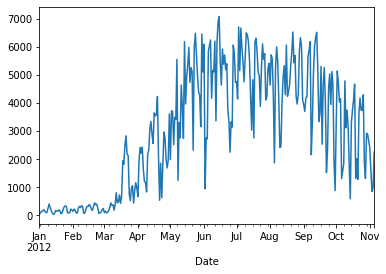

In [8]:
bikes['Berri 1'].plot()

###   Use `.copy()` to make a copy of the `Berri 1` column.
This is just to keep the original data untouched and modify the copied data.

In [9]:
berri_bikes = bikes[['Berri 1']].copy()

In [10]:
bb = bikes["Berri 1"].copy()

In [11]:
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [12]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


### Read and execute the following code to learn how to add a 'weekday' column. 

First, we can get the weekday from the index. 

In [13]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [14]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

And the date: 

In [15]:
berri_bikes.index.date

array([datetime.date(2012, 1, 1), datetime.date(2012, 1, 2),
       datetime.date(2012, 1, 3), datetime.date(2012, 1, 4),
       datetime.date(2012, 1, 5), datetime.date(2012, 1, 6),
       datetime.date(2012, 1, 7), datetime.date(2012, 1, 8),
       datetime.date(2012, 1, 9), datetime.date(2012, 1, 10),
       datetime.date(2012, 1, 11), datetime.date(2012, 1, 12),
       datetime.date(2012, 1, 13), datetime.date(2012, 1, 14),
       datetime.date(2012, 1, 15), datetime.date(2012, 1, 16),
       datetime.date(2012, 1, 17), datetime.date(2012, 1, 18),
       datetime.date(2012, 1, 19), datetime.date(2012, 1, 20),
       datetime.date(2012, 1, 21), datetime.date(2012, 1, 22),
       datetime.date(2012, 1, 23), datetime.date(2012, 1, 24),
       datetime.date(2012, 1, 25), datetime.date(2012, 1, 26),
       datetime.date(2012, 1, 27), datetime.date(2012, 1, 28),
       datetime.date(2012, 1, 29), datetime.date(2012, 1, 30),
       datetime.date(2012, 1, 31), datetime.date(2012, 2, 1),
  

We actually want the weekday, though:

In [16]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

### Now that you know how to *get* the weekday. Add it as a column in our dataframe.

In [17]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4
2012-01-07,98,5
2012-01-08,95,6
2012-01-09,244,0


### Use groupby to group the rows by `weekday` <a name="_adding up the cyclists by weekday"></a>

We want to know if people bike more on weekends or on weekday and which day people bike the most. So we need to add all the values in each weekday.

To do this, we will use the `.groupby()` method. 
Basically, when we "group by" we combine things that have the same value for a field -- in this case, weekday numbers.


In [24]:
berri_bikes.groupby(['weekday'])

###  Use `aggregate(sum)` to add up the cyclists number by weekday

In [25]:
weekday_total_nb_of_bikers = berri_bikes.groupby(['weekday']).aggregate('sum')
weekday_total_nb_of_bikers

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [26]:
berri_bikes.groupby('weekday').sum()

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


What we did was : "Group the rows by weekday and then add up all the values with the same weekday".

### Use .count() after grouping by weekday to know the number of occurance of each weekday : 0 or 1 (Monday or Tuesday, etc.).

In [27]:
weekday_counts = berri_bikes.groupby(['weekday']).count()
weekday_counts

,Berri 1
weekday,
0,45
1,44
2,44
3,44
4,44
5,44
6,45


### Find the average number of people biking each weekday. 
Just divide the total number of bikers per weekday by the number of occurance of each weekdays: 

In [28]:
weekday_means = weekday_total_nb_of_bikers/weekday_counts
weekday_means

,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up by just setting what the index values should be by hand:

In [29]:
weekday_means.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_means

,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


It's always better to visualize our results:

### Make a barplot of the average number of people biking each weekday

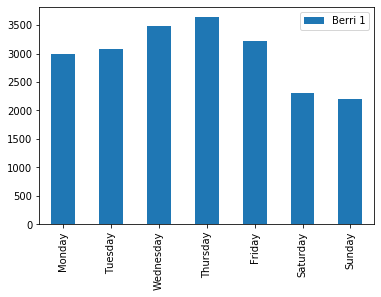

In [30]:
weekday_means.plot(kind='bar')

### So are Montrealers commuter cyclists or bike for fun? do they bike more during the week or the weeked?

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

** You can also get the day with max mean (or min) ** 

In [31]:
weekday_means['Berri 1'].idxmax()

'Thursday'

** groupby() is also a function for the whole DataFrame**

In [32]:
bikes['weekday'] = bikes.index.weekday

bikes_weekday = bikes.groupby('weekday')

bikes_weekday.aggregate(sum)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
weekday,,,,,,,,,
0,134298,0.0,60329,90051,163767,90184,46204,130130,0.0
1,135305,0.0,58708,92035,165880,91399,35167,120088,0.0
2,152972,0.0,67344,104891,186061,102103,43263,133088,0.0
3,160131,0.0,69028,111895,196715,105674,45385,140241,0.0
4,141771,0.0,56446,98568,172390,89872,42470,137255,0.0
5,101578,0.0,34018,62067,105060,48289,52861,112828,0.0
6,99310,0.0,36466,55324,98308,50004,61485,117150,0.0


## Which year it rained the most in Paris

We want to find out which year it rained the most in Paris.

Lets change the data now. We will be using `Paris_Rainfall_Unpivoted.csv` data which contains data about the amount of rainfall in Paris from year 1688 to 2009.

### Load the data. Don't make the year the index this time...



In [33]:
# notice I didn't make the year the index this time...
rain = pd.read_csv('data/Paris_Rainfall_Unpivoted.csv')

In [34]:
rain.head(10)

,Year,Month,Value
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN
5,1688,Jun,75.0
6,1688,Jul,47.0
7,1688,Aug,9.0
8,1688,Sep,43.0
9,1688,Oct,46.0


### Use the .describe() function for every year to explore the data.

First group by year then apply the describe function:

In [35]:
rain.groupby('Year').describe().head(20)

Value                                                       
     count       mean        std   min    25%   50%    75%    max
Year                                                             
1688   7.0  44.714286  19.241572   9.0  43.50  46.0  48.00   75.0
1689  12.0  40.916667  27.975503  18.0  21.50  36.5  46.25  116.0
1690  12.0  47.416667  24.640906   9.0  23.75  53.0  68.50   79.0
1691   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1692   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1693  12.0  51.166667  21.590542  20.0  36.25  53.0  65.00   86.0
1694  12.0  26.833333  24.180508   5.0  10.75  19.0  34.50   90.0
1695  12.0  44.333333  25.021203  12.0  27.50  46.0  57.25   88.0
1696  12.0  43.916667  32.517012  10.0  18.00  34.5  58.00  113.0
1697   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1698   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1699  12.0  42.166667  22.172191  22.0  25.75  31.0  54.25   82.0
1700  12.0  45.250000  27.206700   3.0  29.25  38.5  59.25  100.0
1701  12.0  48.166667  27.152208   2.0  35.25  45.5  57.25  102.0
1702  12.0  36.833333  17.366809  13.0  24.00  40.0  41.25   81.0
1703  12.0  39.000000  20.941477   8.0  27.00  37.5  52.25   77.0
1704  12.0  44.916667  17.170050  19.0  34.75  44.0  56.50   77.0
1705  12.0  31.333333  19.089899   6.0  15.00  32.5  45.50   63.0
1706  12.0  31.250000  20.538766   0.0  15.75  32.5  44.50   68.0
1707  12.0  40.500000  30.663867   9.0  19.25  25.5  66.75   92.0

### Find out in which year Paris had the most rainfall. 
To do that we can simply group by year and apply the function sum. 


In [36]:
rain.groupby('Year').aggregate(sum).head()

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,0.0
1692,0.0


### Plot the result using `plot()`

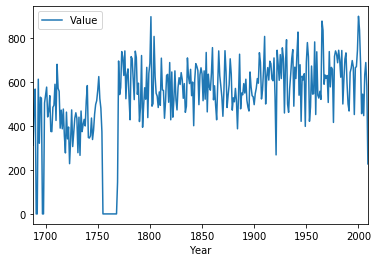

In [37]:
rain.groupby('Year').aggregate(sum).plot()

### Find the average of rainfall per month and not per year.
To do that: group by month, then aggregate using the mean function. We use `mean()` function by NumPy library, imported at the beginning as np.

In [62]:
rr = rain.groupby(["Month"]).aggregate(np.mean)

Some plot types will do groups for you; just say what you want to group "by".
For example, `hist()` will create histograms for you. 

### Plot the histogram per month:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a177a1b38>,
      dtype=object)

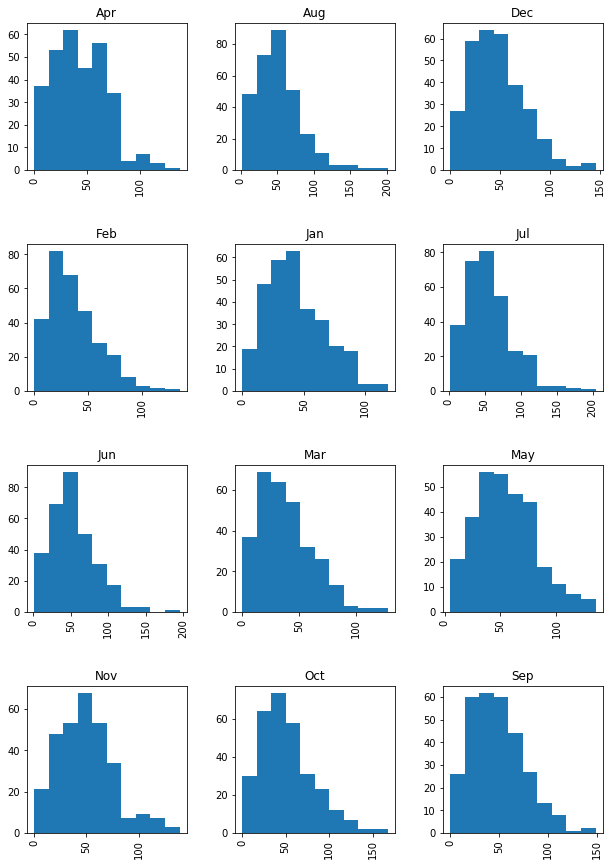

In [48]:
rain.hist('Value', by="Month", figsize=(10,15))

### Group by year and sort the values using `sort_values` function by descending order.

In [70]:
# get the sum by year and sort descending, take top 10:
rain.groupby("Year").aggregate(sum).sort_values(by="Value",ascending=False)[0:10]

,Value
Year,
2000,901.0
1801,899.0
1965,879.0
2001,838.0
1966,836.0
1942,829.0
1910,809.0
1804,809.0
1931,794.0


### Group by year and sort the values using `sort_values` function by ascending order.

In [ ]:
rain.groupby("Year").aggregate(sum).sort_values(by="Value",ascending=True).head()

### We said .aggregate(sum) and .sum()  do the same thing. Try it yourself.

In [ ]:
rain.groupby("Year").sum().head()

Lets do some visualizing. 

### Get the sum by year and plot a barplot, not sorted.  The years should be increasing on the X axis.


In [ ]:
rain.groupby("Year").sum().plot(kind="bar", figsize=(15, 5))

See the effect of sorting: 
### Get the sum by year and sort descending, then plot them all as bars!



In [ ]:
rain.groupby("Year").sum().sort_values(by="Value",ascending=False).plot(kind="bar")

## `groupby` objects type

### Use the function `.groups` to show the dictionaries with their keys and the index of all the rows having this key.

In [74]:
month_rain_dict = rain.groupby("Month").groups
month_rain_dict

{'Apr': Int64Index([   3,   15,   27,   39,   51,   63,   75,   87,   99,  111,
             ...
             3747, 3759, 3771, 3783, 3795, 3807, 3819, 3831, 3843, 3855],
            dtype='int64', length=322),
 'Aug': Int64Index([   7,   19,   31,   43,   55,   67,   79,   91,  103,  115,
             ...
             3751, 3763, 3775, 3787, 3799, 3811, 3823, 3835, 3847, 3859],
            dtype='int64', length=322),
 'Dec': Int64Index([  11,   23,   35,   47,   59,   71,   83,   95,  107,  119,
             ...
             3755, 3767, 3779, 3791, 3803, 3815, 3827, 3839, 3851, 3863],
            dtype='int64', length=322),
 'Feb': Int64Index([   1,   13,   25,   37,   49,   61,   73,   85,   97,  109,
             ...
             3745, 3757, 3769, 3781, 3793, 3805, 3817, 3829, 3841, 3853],
            dtype='int64', length=322),
 'Jan': Int64Index([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,
             ...
             3744, 3756, 3768, 3780, 3792, 3804, 3816, 3828

### Access the October month data  
Remember `groupby` objects types are dictionaries.


In [75]:
month_rain_dict['Oct']

Int64Index([   9,   21,   33,   45,   57,   69,   81,   93,  105,  117,
            ...
            3753, 3765, 3777, 3789, 3801, 3813, 3825, 3837, 3849, 3861],
           dtype='int64', length=322)

### Create a dictionary called years which contains the rain data grouped by Year and iterate over its items. Print the key when you iterate.

In [71]:
years = rain.groupby("Year")
# special kind of dict that doesn't allow items() -- but works same way:
for name, group in years:
    print("In group ",name)
    print(group)

In group  1688
    Year Month  Value
0   1688   Jan    NaN
1   1688   Feb    NaN
2   1688   Mar    NaN
3   1688   Apr    NaN
4   1688   May    NaN
5   1688   Jun   75.0
6   1688   Jul   47.0
7   1688   Aug    9.0
8   1688   Sep   43.0
9   1688   Oct   46.0
10  1688   Nov   44.0
11  1688   Dec   49.0
In group  1689
    Year Month  Value
12  1689   Jan   36.0
13  1689   Feb   22.0
14  1689   Mar   22.0
15  1689   Apr   37.0
16  1689   May   18.0
17  1689   Jun   20.0
18  1689   Jul  116.0
19  1689   Aug   41.0
20  1689   Sep   45.0
21  1689   Oct   50.0
22  1689   Nov   66.0
23  1689   Dec   18.0
In group  1690
    Year Month  Value
24  1690   Jan   70.0
25  1690   Feb   32.0
26  1690   Mar   43.0
27  1690   Apr   24.0
28  1690   May   68.0
29  1690   Jun   63.0
30  1690   Jul   73.0
31  1690   Aug   79.0
32  1690   Sep   21.0
33  1690   Oct   64.0
34  1690   Nov   23.0
35  1690   Dec    9.0
In group  1691
    Year Month  Value
36  1691   Jan    NaN
37  1691   Feb    NaN
38  1691   Mar  

1103  1779   Dec   80.0
In group  1780
      Year Month  Value
1104  1780   Jan   42.0
1105  1780   Feb   21.0
1106  1780   Mar   40.0
1107  1780   Apr   47.0
1108  1780   May   28.0
1109  1780   Jun   49.0
1110  1780   Jul   56.0
1111  1780   Aug   84.0
1112  1780   Sep   61.0
1113  1780   Oct   37.0
1114  1780   Nov   65.0
1115  1780   Dec    0.0
In group  1781
      Year Month  Value
1116  1781   Jan   28.0
1117  1781   Feb   60.0
1118  1781   Mar    0.0
1119  1781   Apr   19.0
1120  1781   May   27.0
1121  1781   Jun   72.0
1122  1781   Jul   42.0
1123  1781   Aug   30.0
1124  1781   Sep   35.0
1125  1781   Oct    7.0
1126  1781   Nov   82.0
1127  1781   Dec   27.0
In group  1782
      Year Month  Value
1128  1782   Jan   88.0
1129  1782   Feb   11.0
1130  1782   Mar  108.0
1131  1782   Apr   63.0
1132  1782   May  107.0
1133  1782   Jun   17.0
1134  1782   Jul   52.0
1135  1782   Aug  107.0
1136  1782   Sep   60.0
1137  1782   Oct   31.0
1138  1782   Nov   49.0
1139  1782   Dec   

2303  1879   Dec   10.0
In group  1880
      Year Month  Value
2304  1880   Jan   10.0
2305  1880   Feb   39.0
2306  1880   Mar    4.0
2307  1880   Apr   52.0
2308  1880   May    5.0
2309  1880   Jun   70.0
2310  1880   Jul   71.0
2311  1880   Aug   40.0
2312  1880   Sep   46.0
2313  1880   Oct   99.0
2314  1880   Nov   40.0
2315  1880   Dec   53.0
In group  1881
      Year Month  Value
2316  1881   Jan   59.0
2317  1881   Feb   25.0
2318  1881   Mar   40.0
2319  1881   Apr   49.0
2320  1881   May   34.0
2321  1881   Jun   39.0
2322  1881   Jul   33.0
2323  1881   Aug   57.0
2324  1881   Sep   91.0
2325  1881   Oct   27.0
2326  1881   Nov   31.0
2327  1881   Dec   26.0
In group  1882
      Year Month  Value
2328  1882   Jan    9.0
2329  1882   Feb   19.0
2330  1882   Mar   33.0
2331  1882   Apr   65.0
2332  1882   May   28.0
2333  1882   Jun   32.0
2334  1882   Jul   43.0
2335  1882   Aug   41.0
2336  1882   Sep   64.0
2337  1882   Oct   56.0
2338  1882   Nov  115.0
2339  1882   Dec   

3623  1989   Dec   77.0
In group  1990
      Year Month  Value
3624  1990   Jan   37.0
3625  1990   Feb   78.0
3626  1990   Mar    6.0
3627  1990   Apr   56.0
3628  1990   May    8.0
3629  1990   Jun   86.0
3630  1990   Jul   34.0
3631  1990   Aug    9.0
3632  1990   Sep   36.0
3633  1990   Oct   77.0
3634  1990   Nov   30.0
3635  1990   Dec   44.0
In group  1991
      Year Month  Value
3636  1991   Jan   54.0
3637  1991   Feb   15.0
3638  1991   Mar   62.0
3639  1991   Apr   34.0
3640  1991   May   18.0
3641  1991   Jun   46.0
3642  1991   Jul   47.0
3643  1991   Aug   22.0
3644  1991   Sep   46.0
3645  1991   Oct   33.0
3646  1991   Nov   66.0
3647  1991   Dec   26.0
In group  1992
      Year Month  Value
3648  1992   Jan    8.0
3649  1992   Feb   26.0
3650  1992   Mar   49.0
3651  1992   Apr   30.0
3652  1992   May  133.0
3653  1992   Jun   57.0
3654  1992   Jul   29.0
3655  1992   Aug   68.0
3656  1992   Sep   45.0
3657  1992   Oct   55.0
3658  1992   Nov   82.0
3659  1992   Dec   

### Find the median of rainfall values for each year.

In [ ]:
years.aggregate(np.median).head()

### Find the size of each group (it's months, so 12, right?)

In [ ]:
years.size().head()

### Apply multiple aggregate functions at once for the rainfall values.

`data.groupby(['column_name_with_categories', as_index=])[['column_name_to_access_statistics']].agg({'column1':'function1', 'column2':'function2',...})` 



In [ ]:
yearstats = years["Value"].agg({"mean": np.mean, "median": np.median, "min": min, "max": max})
yearstats.head()

### Plot the median

In [ ]:
yearstats['median'].plot()

### Group by month and use `get_group` to plot  the rainfall values of March 

In [ ]:
rain.groupby("Month").get_group("Mar").plot("Year", "Value")